In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/torch-test/oliver.txt
/kaggle/input/spooky-vw-tutorial/bank_train.csv
/kaggle/input/spooky-vw-tutorial/test_prob1.txt
/kaggle/input/spooky-vw-tutorial/reviews_test.pkl
/kaggle/input/spooky-vw-tutorial/20news_model_mult.vw
/kaggle/input/spooky-vw-tutorial/movie_test_pred2.txt
/kaggle/input/spooky-vw-tutorial/20news_model.vw
/kaggle/input/spooky-vw-tutorial/valid_text_feat.vw
/kaggle/input/spooky-vw-tutorial/bank_train_target.csv
/kaggle/input/spooky-vw-tutorial/movie_reviews_model2.vw
/kaggle/input/spooky-vw-tutorial/vw_test_pred.csv
/kaggle/input/spooky-vw-tutorial/test_only_text.vw
/kaggle/input/spooky-vw-tutorial/movie_test_pred.txt
/kaggle/input/spooky-vw-tutorial/test_prob2.txt
/kaggle/input/spooky-vw-tutorial/valid_prob2.txt
/kaggle/input/spooky-vw-tutorial/movie_valid_pred.txt
/kaggle/input/spooky-vw-tutorial/model_text_feat.vw
/kaggle/input/spooky-vw-tutorial/train_part_text_feat.vw
/kaggle/input/spooky-vw-tutorial/reviews_train.pkl
/kaggle/input/spooky-vw-tutorial

/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/README.md
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/Makefile
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/pom.xml
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/vowpalWabbit_learner_VWScalarsLearner.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/vowpalWabbit_learner_VWScalarLearner.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/vowpalWabbit_learner_VWScalarLearner.h
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/jni_base_learner.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/vowpalWabbit_learner_VWLearners.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/vowpalWabbit_learner_VWMultilabelsLearner.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/java/src/main/c++/jn

/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/library/test_search.dSYM/Contents/Info.plist
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/library/test_search.dSYM/Contents/Resources/DWARF/test_search
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/library/library_example.dSYM/Contents/Info.plist
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/library/library_example.dSYM/Contents/Resources/DWARF/library_example
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/python/requirements.txt
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/python/MANIFEST.in
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/python/pylibvw.cc
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/python/README.rst
/kaggle/input/spooky-vw-tutorial/vowpal_wabbit/vowpal_wabbit/python/src/python/windows_build.bat
/kaggle/input/spooky-v

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import unidecode
import random
import torch

train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
	print('Training on GPU!')
else: 
	print('No GPU available, training on CPU; consider making n_epochs very small.')
	
	
	
train_df = pd.read_csv('../input/spooky-authors-csv/train.csv')
author = train_df[train_df['author'] == 'EAP']["text"]
author[:5]

text = list(author[:100])
def joinStrings(text):
	return ' '.join(string for string in text)
text = joinStrings(text)
# text = [item for sublist in author[:5].values for item in sublist]
len(text.split())


stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
	stop_free = " ".join([i for i in doc.split() if i not in stop])
	punc_free = "".join(ch for ch in stop_free if ch not in exclude)
	normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
	return normalized
test_sentence = clean(text).lower().split()


trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
		for i in range(len(test_sentence) - 2)]
chunk_len=len(trigrams)
print(trigrams[:3])




No GPU available, training on CPU; consider making n_epochs very small.
[(['this', 'process'], 'however'), (['process', 'however'], 'afforded'), (['however', 'afforded'], 'mean')]


In [16]:
vocab = set(test_sentence)
voc_len=len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [17]:
inp=[]
tar=[]
for context, target in trigrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        inp.append(context_idxs)
        targ = torch.tensor([word_to_ix[target]], dtype=torch.long)
        tar.append(targ)

In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size*2, hidden_size, n_layers,batch_first=True,
                          bidirectional=False)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [19]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [20]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [21]:
def evaluate(prime_str='this process', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()

    for p in range(predict_len):
        
        prime_input = torch.tensor([word_to_ix[w] for w in prime_str.split()], dtype=torch.long)
        inp = prime_input[-2:] #last two words as input
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted word to string and use as next input
        predicted_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(top_i)]
        prime_str += " " + predicted_word
#         inp = torch.tensor(word_to_ix[predicted_word], dtype=torch.long)

    return prime_str

In [22]:
n_epochs = 100
print_every = 1
plot_every = 1
hidden_size = 100
n_layers = 1
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
if(train_on_gpu):
    decoder.cuda()
for epoch in range(1, n_epochs + 1):
    print(evaluate('hi i', 40, temperature=1))
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 50, loss))
#         print(evaluate('ge', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

hi i me charnel much composition unknown see not stage unrelenting existence we veranda replied g closer quarter california became ago superstition sign detail quietly nearly non brandy cosmogony closer in other mean gun lie especial epimenides instance sinner brought lie disagreeable
 2s (1 0%) 6.9862]
hi i is enclosure hitherto goat expected scarcely u pxh remembrance started soon remote met populace glorious sufficiently demurely unrelenting around draw future effected full cell spirit chagrin box heaven saluted wide impertinence taught gx far i cloak a stately stream diminution
 5s (2 1%) 6.3634]
hi i orion cough filled noble epicurus gazette ascended sail belonging gott solemn taught entire writer immediate full attach elipse even clothed superstition filled space shrine step thin earliest assured scarabæus glance given laid draw apparently verge atmosphere discussed sinivate back connection
 7s (3 1%) 5.7412]
hi i automaton subject perceptible tongue alone opened scarabæus to sen

 52s (27 13%) 0.0012]
hi i repeat regard arrangement noose neck the boat however must detained we started four oclock legrand jupiter dog myself in particular instance understood probable proceeded upon route average diversity accustomed one having noticed particular others i turned eye upon glorious prospect
 54s (28 14%) 0.0011]
hi i ho ho ho hu hu hu hu good indeed you must astonished mon ami friend wit drole must understand letter it true i may find opportunity transmitting world i fall make endeavour i repeat landscape arrangement collocation alone physical nature
 56s (29 14%) 0.0010]
hi i knew least i get something like definite information the system disadvantage even danger but dear fellow joking then said i this passable skull indeed i may say excellent skull according vulgar notion specimen physiology scarabæus must queerest scarabæus world resembles
 57s (30 15%) 0.0008]
hi i turned road somewhat abruptly hitherto i became aware building kind lay foot gentle declivity me el

 43s (55 27%) 0.0002]
hi i certainly expected would so here barricaded ourselves and present secure but glance show fallacy idea to speech gave course interpretation fancying doubt event i come possession vast quantity ready money provided i paid i owed trifle more consideration service i
 45s (56 28%) 0.0002]
hi i knew could say stereotomy without brought think atomies thus theory epicurus since discussed subject long ago i mentioned singularly yet little notice vague guess noble greek met confirmation late nebular cosmogony i felt could avoid casting eye upward great nebula
 47s (57 28%) 0.0002]
hi i heard furious vibration chain i longed love filled overflowing the rigging found ill fitted greatly strained third day blow five afternoon mizzen mast heavy lurch windward went board a closer scrutiny however satisfied intended kid ha ha said i to
 49s (58 28%) 0.0002]
hi i unable solve in meantime folly grieve think perhaps gradation copy rendered readily perceptible or possibly i owed 

hi i obtuse something upon view the present peculiar condition affair court especially intrigue d known involved would render instant availability document susceptibility produced moment notice point nearly equal importance possession it supposed however great underduk suffered impertinence part little old man
 37s (84 42%) 0.0002]
hi i knew could say stereotomy without brought think atomies thus theory epicurus since discussed subject long ago i mentioned singularly yet little notice vague guess noble greek met confirmation late nebular cosmogony i felt could avoid casting eye upward great nebula
 39s (85 42%) 0.0002]
hi i heard furious vibration chain i longed love filled overflowing the rigging found ill fitted greatly strained third day blow five afternoon mizzen mast heavy lurch windward went board a closer scrutiny however satisfied intended kid ha ha said i to
 41s (86 43%) 0.0002]
hi i solve trifle more consideration service i dare say cared little became either soul carcass i 

In [ ]:
n_epochs = 100
print_every = 1
plot_every = 1
hidden_size = 100
n_layers = 1
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
if(train_on_gpu):
    decoder.cuda()
for epoch in range(1, n_epochs + 1):
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 50, loss))
#         print(evaluate('ge', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

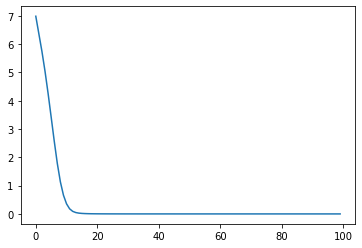

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [24]:
print(evaluate('hi i', 40, temperature=1))

hi i still quickened pace it spirit wisdom that among ancient hebrews believed gate heaven would inevitably opened sinner saint who good lung implicit confidence vociferate word amen it spirit wisdom that great plague raged athens every mean vain attempted removal epimenides
